# **About the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('financial_sentiment_data.csv')
df.head() 

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


# **Basic Exploratory Data Analysis**

In [ ]:
# Review one code
df['Sentence'][0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

The data is imbalanced.

In [ ]:
df.shape

(5842, 2)

In [ ]:
# create a sample DataFrame with sentence and sentiment columns
df1 = pd.read_csv('financial_sentiment_data.csv')

# drop duplicate rows based on Sentence column
df = df1.drop_duplicates(subset=["Sentence"], keep="last")

# print the unique sentences and sentiments
for i, row in df.iterrows():
    print(f"Sentence {i+1}: {row['Sentence']} ({row['Sentiment']})")

Streaming output truncated to the last 5000 lines.
Sentence 387: Operating profit rose to EUR 1.6 mn from EUR 1.1 mn in the corresponding period in 2006 . (positive)
Sentence 388: Making matters more difficult , the company said it has been grappling with higher oil and gas prices , which have pushed up the cost of energy , raw materials and transportation . (negative)
Sentence 389: $VRTX Vertex. Monthly -lower hi/lower lo,  Long term uptrend intract so far (positive)
Sentence 390: Financial details were not disclosed . (neutral)
Sentence 391: These include software development for internet and mobile telephone content , communications , value-added software , financial services , security applications , systems integration and electronics , '' EBRD informed . (neutral)
Sentence 393: Should You Follow Berkshire Hathaway Into Apple Stock? (neutral)
Sentence 394: The total amount of subscription prices was recorded in the fund for invested non-restricted equity . (neutral)
Sentence 395: 

In [ ]:
df.shape

(5322, 2)

# **Count Plot**

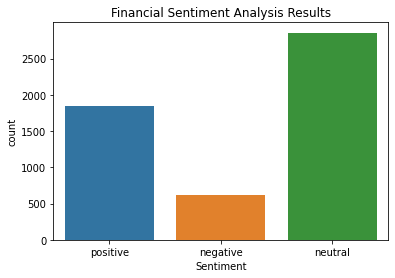

In [ ]:
sns.countplot(x='Sentiment',data = df).set(title = 'Financial Sentiment Analysis Results')
plt.show()

# **Pie Chart**

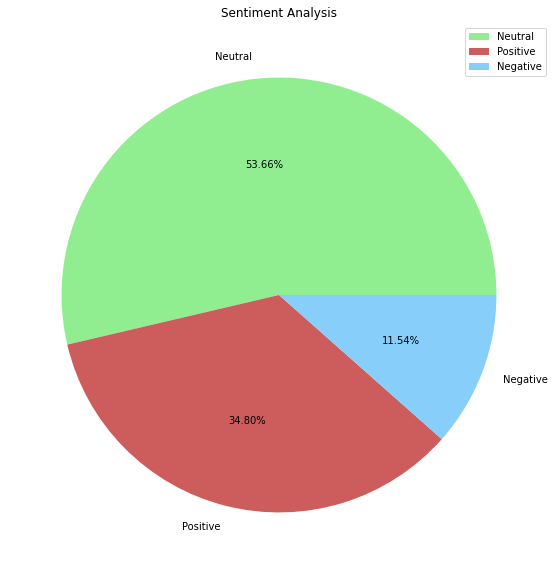

In [ ]:
plt.figure(figsize = (15,10))
colors = ['lightgreen', 'indianred', 'lightskyblue']
plt.pie(df['Sentiment'].value_counts(), labels = ['Neutral','Positive','Negative'], autopct = "%0.2f%%",colors=colors)
plt.title('Sentiment Analysis')
plt.legend(loc='upper right')
plt.show()

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

<ipython-input-12-930809a509e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = le.fit_transform(df['Sentiment'])


In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1


Labels of Sentiment Column

Negative = 0

Neutral = 1

Positive = 2

In [ ]:
negative_df = df[df['Sentiment'] == 0]
neutral_df = df[df['Sentiment'] == 1]
positive_df = df[df['Sentiment'] == 2]

# **World Cloud**

## 1) Full data world cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

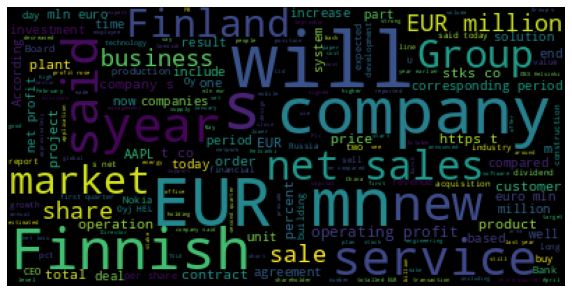

In [ ]:
wc=WordCloud(max_font_size=55, background_color="black",random_state=1)
wc.generate(''.join(df['Sentence']))
plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wc)

In [ ]:
freq = pd.Series(''.join(df['Sentence']).split()).value_counts()[:20] #top 20 words
freq

the        4242
,          4018
of         2928
in         2516
to         2435
and        2332
a          1564
for        1153
EUR         888
.The        885
is          866
's          855
from        756
will        746
on          721
company     686
its         560
by          537
as          528
be          519
dtype: int64

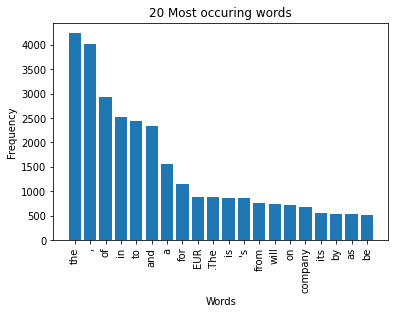

In [ ]:
plt.bar(freq.index, freq.values)  
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

## 2) Positive Sentiment WordCloud

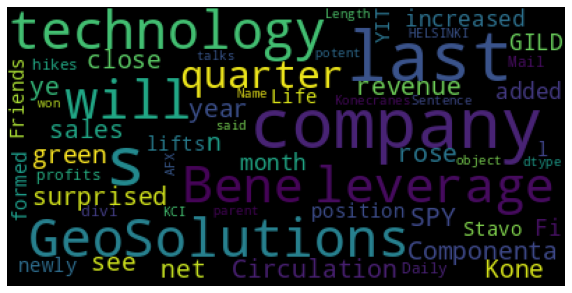

In [ ]:
wordcloud_positive = WordCloud(background_color='black',max_font_size=50,random_state=1).generate(str(positive_df['Sentence']))
                  
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

In [ ]:
freq_positive = pd.Series(''.join(positive_df['Sentence']).split()).value_counts()[:20] #top 20 words
freq_positive

the        1204
,          1060
to          963
in          872
of          796
and         634
a           543
for         441
EUR         384
from        376
's          271
mn          238
its         229
on          227
with        197
company     191
sales       190
said        190
by          189
profit      187
dtype: int64

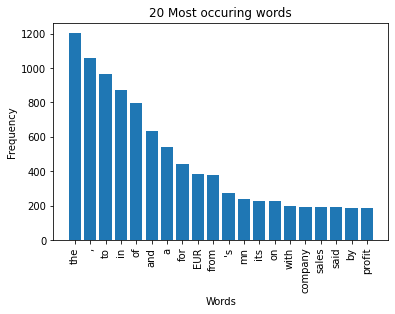

In [ ]:
plt.bar(freq_positive.index, freq_positive.values)  
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

## Negative Sentiment WordCloud

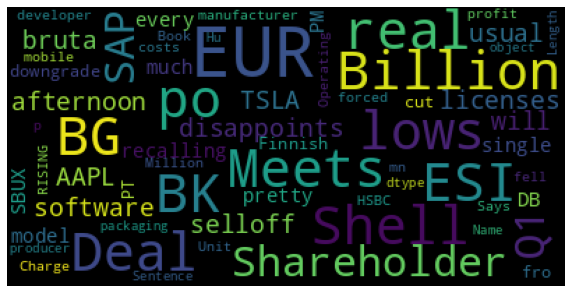

In [ ]:
wordcloud_negative = WordCloud(background_color='black',max_font_size=50,random_state=1).generate(str(negative_df['Sentence']))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

In [ ]:
freq_negative = pd.Series(''.join(negative_df['Sentence']).split()).value_counts()[:20] #top 20 words
freq_negative

the        343
to         255
in         223
of         215
,          205
EUR        162
a          151
and        117
from       115
for        108
mn         105
profit      82
on          80
down        62
by          61
as          54
sales       51
million     50
)           50
's          49
dtype: int64

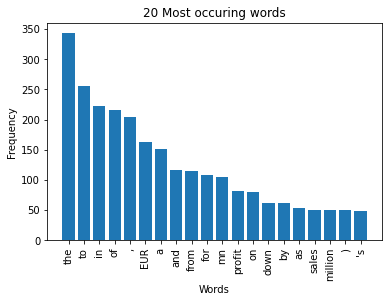

In [ ]:
plt.bar(freq_negative.index, freq_negative.values)  
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

## Neutral Sentiment WordCloud


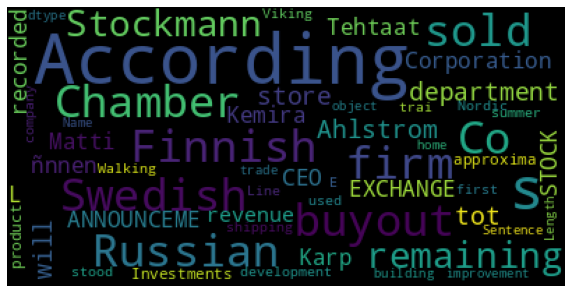

In [ ]:
wordcloud_neutral = WordCloud(background_color='black',max_font_size=50,random_state=1).generate(str(neutral_df['Sentence']))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_neutral)
plt.axis('off')
plt.show()

In [ ]:
freq_neutral = pd.Series(''.join(neutral_df['Sentence']).split()).value_counts()[:20] #top 20 words
freq_neutral

,          2753
the        2695
of         1917
and        1581
in         1421
to         1217
a           870
.The        846
is          653
for         604
will        554
's          535
company     454
on          414
be          390
EUR         342
as          331
its         294
by          287
with        286
dtype: int64

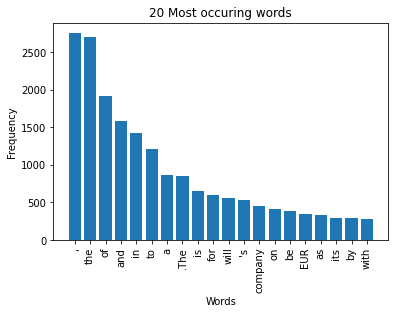

In [ ]:
plt.bar(freq_neutral.index, freq_neutral.values)  
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
freq_df = pd.DataFrame({'All':freq,
                   'positive':freq_positive,
                   'negative':freq_negative,
                   'neutral':freq_neutral})
#freq_df.sort_values(by = list(freq_df.columns),ascending = True)
freq_df.sort_values(by=['All','positive','negative','neutral'],inplace = True, ascending = False)
freq_df

,All,positive,negative,neutral
the,4242.0,1204.0,343.0,2695.0
",",4018.0,1060.0,205.0,2753.0
of,2928.0,796.0,215.0,1917.0
in,2516.0,872.0,223.0,1421.0
to,2435.0,963.0,255.0,1217.0
and,2332.0,634.0,117.0,1581.0
a,1564.0,543.0,151.0,870.0
for,1153.0,441.0,108.0,604.0
EUR,888.0,384.0,162.0,342.0
.The,885.0,NaN,NaN,846.0


# **Text Cleaning**

In [ ]:
'''
#import re #regular expression
#import string

def clean_text(text):

  #Make text lowercase, remove text in square brackets,
  #remove punctuation and remove words containing numbers.
  
  #text = text.lower()
  text = re.sub('\[.*?\]', '', text)# * means any number of time
  text = re.sub('<.*?>', '', text)# This pattern helps in removing the html tags
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Removes Punctuation
  #text = re.sub('\w*\d\w*', '', text)# Removes alphanumeric digits like ab123, 1xyz3
  #text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[''""...]', '', text)# Removes single and double quotes, ellipses, and periods
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
  text = re.sub("[^0-9a-z]+"," ",text)
  return text

clean = lambda x: clean_text(x)
'''

'\n#import re #regular expression\n#import string\n\ndef clean_text(text):\n\n  #Make text lowercase, remove text in square brackets,\n  #remove punctuation and remove words containing numbers.\n  \n  #text = text.lower()\n  text = re.sub(\'\\[.*?\\]\', \'\', text)# * means any number of time\n  text = re.sub(\'<.*?>\', \'\', text)# This pattern helps in removing the html tags\n  text = re.sub(\'[%s]\' % re.escape(string.punctuation), \'\', text) # Removes Punctuation\n  #text = re.sub(\'\\w*\\d\\w*\', \'\', text)# Removes alphanumeric digits like ab123, 1xyz3\n  #text = re.sub("[0-9" "]+"," ",text)\n  text = re.sub(\'[\'\'""...]\', \'\', text)# Removes single and double quotes, ellipses, and periods\n  text = re.sub(r\'https?://\\S+|www\\.\\S+\', \'\', text) # Remove URLs\n  text = re.sub("[^0-9a-z]+"," ",text)\n  return text\n\nclean = lambda x: clean_text(x)\n'

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers
    #text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
     # Tokenize text
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = stopwords.words('english')

    words = [word for word in words if word not in stop_words]
    

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words to form text
    text = ' '.join(words)
    
    return text

In [ ]:
df['clean_text'] = df['Sentence'].apply(clean_text)
df

<ipython-input-32-1f3ccf561527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['Sentence'].apply(clean_text)


,Sentence,Sentiment,clean_text
0,The GeoSolutions technology will leverage Bene...,2,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",2,last quarter 2010 componenta net sale doubled ...
3,According to the Finnish-Russian Chamber of Co...,1,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,1,swedish buyout firm sold remaining 224 percent...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,0,rising cost forced packaging producer huhtamak...
5838,Nordic Walking was first used as a summer trai...,1,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",1,according shipping company viking line eu deci...
5840,"In the building and home improvement trade , s...",1,building home improvement trade sale decreased...


In [ ]:
positive_df = positive_df.copy()
positive_df['clean_text_positive'] = positive_df['Sentence'].apply(clean_text)
positive_df

,Sentence,Sentiment,clean_text_positive
0,The GeoSolutions technology will leverage Bene...,2,geosolutions technology leverage benefon gps s...
2,"For the last quarter of 2010 , Componenta 's n...",2,last quarter 2010 componenta net sale doubled ...
5,$SPY wouldn't be surprised to see a green close,2,spy wouldnt surprised see green close
8,Kone 's net sales rose by some 14 % year-on-ye...,2,kone net sale rose 14 yearonyear first nine mo...
10,Circulation revenue has increased by 5 % in Fi...,2,circulation revenue increased 5 finland 4 swed...
...,...,...,...
5819,Last month we added to our $GILD position and ...,2,last month added gild position started new one...
5824,`` In the newly formed company YIT Stavo the l...,2,newly formed company yit stavo local contact n...
5825,Friends Life lifts profits 38% and hikes divi ...,2,friend life lift profit 38 hike divi ahead pro...
5836,Daily Mail parent company in talks with potent...,2,daily mail parent company talk potential partn...


In [ ]:
negative_df = negative_df.copy()
negative_df['clean_text_negative'] = negative_df['Sentence'].apply(clean_text)
negative_df

,Sentence,Sentiment,clean_text_negative
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low 150 250 bk real possibility
6,Shell's $70 Billion BG Deal Meets Shareholder ...,0,shell 70 billion bg deal meet shareholder skep...
11,$SAP Q1 disappoints as #software licenses down...,0,sap q1 disappoints software license real probl...
39,$AAPL afternoon selloff as usual will be bruta...,0,aapl afternoon selloff usual brutal get ready ...
40,$TSLA recalling pretty much every single model...,0,tsla recalling pretty much every single model ...
...,...,...,...
5829,"$SBUX down PM, from $DB downgrade.. PT cut fro...",0,sbux pm db downgrade pt cut 70 64
5831,Finnish developer and manufacturer of mobile p...,0,finnish developer manufacturer mobile phone ch...
5832,Operating profit fell to EUR 38.1 mn from EUR ...,0,operating profit fell eur 381 mn eur 553 mn 2007
5835,HSBC Says Unit to Book $585 Million Charge on ...,0,hsbc say unit book 585 million charge settlement


In [ ]:
neutral_df = neutral_df.copy()
neutral_df['clean_text_neutral'] = neutral_df['Sentence'].apply(clean_text)
neutral_df

,Sentence,Sentiment,clean_text_neutral
3,According to the Finnish-Russian Chamber of Co...,1,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,1,swedish buyout firm sold remaining 224 percent...
9,The Stockmann department store will have a tot...,1,stockmann department store total floor space 8...
14,Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...,1,ahlstrom corporation stock exchange announceme...
17,According to L+ñnnen Tehtaat 's CEO Matti Karp...,1,according lñnnen tehtaat ceo matti karppinen c...
...,...,...,...
5833,"In 2008 , Kemira recorded revenue of approxima...",1,2008 kemira recorded revenue approximately eur...
5834,Investments in product development stood at 6....,1,investment product development stood 60 mln eu...
5838,Nordic Walking was first used as a summer trai...,1,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",1,according shipping company viking line eu deci...


# **Checking the frequency of words after removing stopwords**

In [ ]:
freq_Sw = pd.Series(' '.join(df['clean_text']).split()).value_counts()[:20] #top 20 words
freq_Sw

eur          973
company      830
sale         515
mn           509
share        465
said         452
finnish      438
profit       431
million      419
net          400
year         308
group        302
finland      287
market       287
service      285
mln          282
operating    282
2009         273
new          269
business     260
dtype: int64

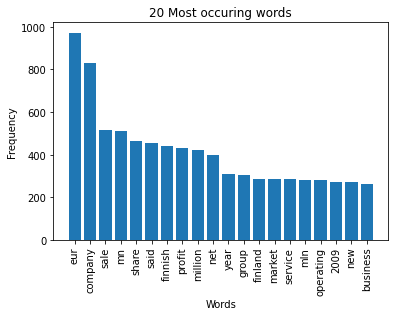

In [ ]:
plt.bar(freq_Sw.index, freq_Sw.values)  
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
freq_Sw_positive = pd.Series(' '.join(positive_df['clean_text_positive']).split()).value_counts()[:20] #top 20 words
freq_Sw_positive

eur          436
mn           239
company      232
sale         229
profit       208
net          197
said         194
finnish      177
million      164
year         162
period       141
mln          125
operating    120
quarter      116
share        110
group        104
2010         103
2009         102
new           96
rose          92
dtype: int64

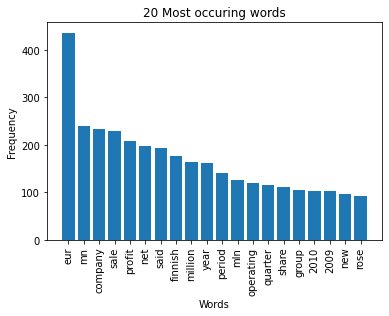

In [ ]:
plt.bar(freq_Sw_positive.index, freq_Sw_positive.values)  
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
freq_Sw_negative = pd.Series(' '.join(negative_df['clean_text_negative']).split()).value_counts()[:20] #top 20 words
freq_Sw_negative

eur          169
mn           105
profit        91
sale          61
share         54
million       53
net           51
company       48
operating     48
2008          45
finnish       45
short         44
period        44
loss          43
quarter       43
2009          40
price         38
compared      37
mln           36
year          36
dtype: int64

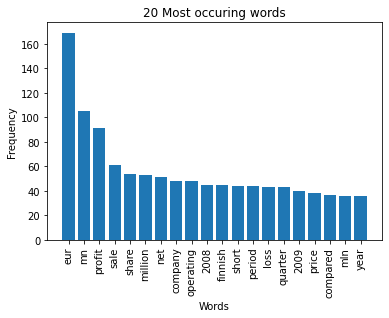

In [ ]:
plt.bar(freq_Sw_negative.index, freq_Sw_negative.values)
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
freq_Sw_neutral = pd.Series(' '.join(neutral_df['clean_text_neutral']).split()).value_counts()[:20] #top 20 words
freq_Sw_neutral

company     550
eur         368
share       301
said        233
sale        225
finnish     216
finland     209
million     202
service     194
group       183
business    182
market      176
mn          165
new         161
net         152
2008        136
profit      132
2009        131
also        127
2007        125
dtype: int64

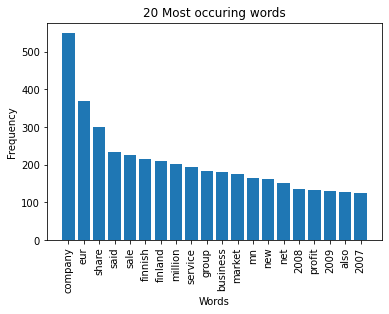

In [ ]:
plt.bar(freq_Sw_neutral.index, freq_Sw_neutral.values)
plt.title("20 Most occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
freq_df = pd.DataFrame({'all':freq_Sw,
                   'positive':freq_Sw_positive,
                   'negative':freq_Sw_negative,
                   'neutral':freq_Sw_neutral})
#freq_df.sort_values(by = list(freq_df.columns),ascending = True)
freq_df.sort_values(by=['all','positive','negative','neutral'],inplace = True, ascending = False)
freq_df

,all,positive,negative,neutral
eur,973.0,436.0,169.0,368.0
company,830.0,232.0,48.0,550.0
sale,515.0,229.0,61.0,225.0
mn,509.0,239.0,105.0,165.0
share,465.0,110.0,54.0,301.0
said,452.0,194.0,NaN,233.0
finnish,438.0,177.0,45.0,216.0
profit,431.0,208.0,91.0,132.0
million,419.0,164.0,53.0,202.0
net,400.0,197.0,51.0,152.0


# **After Text processing and removing stopwords**

## Full data wordcloud

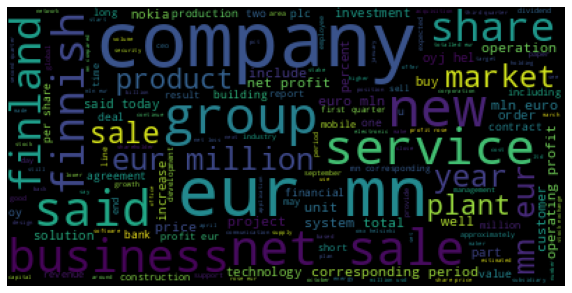

In [ ]:
wc=WordCloud(max_font_size=55, background_color="black",random_state=1)
wc.generate(''.join(df['clean_text']))

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wc)

## Positive Sentiment WordCloud


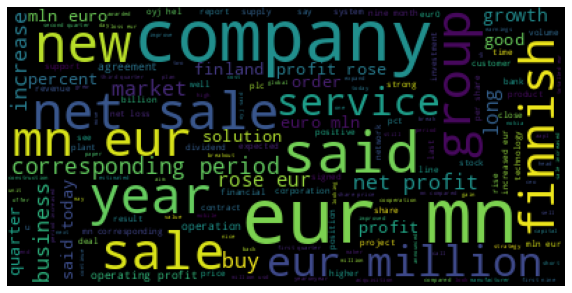

In [ ]:
wordcloud_positive=WordCloud(max_font_size=55, background_color="black",random_state=1)
wordcloud_positive.generate(''.join(positive_df['clean_text_positive']))

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_positive)

## Negative Sentiment WordCloud

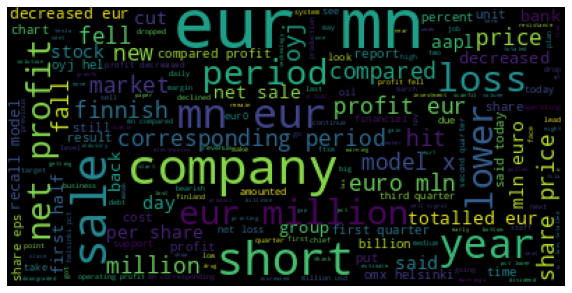

In [ ]:
swordcloud_negative=WordCloud(max_font_size=55, background_color="black",random_state=1)
wordcloud_negative.generate(''.join(negative_df['clean_text_negative']))
plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_negative)

## Neutral Sentiment WordCloud

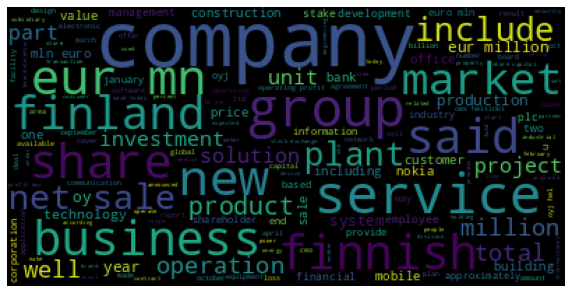

In [ ]:
wordcloud_neutral=WordCloud(max_font_size=55, background_color="black",random_state=1)
wordcloud_neutral.generate(''.join(neutral_df['clean_text_neutral']))

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_neutral)

# **Text Vectorizer**

# **N-gram**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Uni-gram
def get_top_n1_words(corpus, n=None):
  vec = CountVectorizer(ngram_range=(1,1),
                         max_features = 2000).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [ ]:
top1_words = get_top_n1_words(df["clean_text"], n= 200) #top 200
top1_df = pd.DataFrame(top1_words)
top1_df.columns=["Uni-gram","Freq"]
top1_df.head(50)

,Uni-gram,Freq
0,eur,973
1,company,830
2,sale,515
3,mn,509
4,share,465
5,said,452
6,finnish,438
7,profit,431
8,million,419
9,net,400


In [ ]:
freq_unigram = pd.Series(str(top1_words)).value_counts()[:20] #top 20 words
freq_unigram

[('eur', 973), ('company', 830), ('sale', 515), ('mn', 509), ('share', 465), ('said', 452), ('finnish', 438), ('profit', 431), ('million', 419), ('net', 400), ('year', 308), ('group', 302), ('finland', 287), ('market', 287), ('service', 285), ('operating', 282), ('mln', 282), ('2009', 273), ('new', 269), ('business', 260), ('2008', 258), ('period', 254), ('quarter', 241), ('2007', 228), ('2010', 214), ('euro', 214), ('oyj', 202), ('also', 199), ('first', 185), ('today', 170), ('loss', 163), ('price', 162), ('product', 161), ('2006', 161), ('operation', 152), ('contract', 150), ('solution', 145), ('helsinki', 138), ('total', 137), ('stock', 137), ('compared', 137), ('bank', 135), ('plant', 130), ('order', 129), ('percent', 128), ('unit', 127), ('system', 127), ('per', 125), ('financial', 124), ('customer', 121), ('investment', 120), ('nokia', 119), ('technology', 114), ('corresponding', 114), ('corporation', 112), ('capital', 109), ('result', 109), ('project', 108), ('well', 107), ('acc

In [ ]:
#stop_words = stopwords.words('english')
#sw_list1 = ['eur','mn','said','mln','euro','oyj','hel','pct','omx','plc','oy','eur0']
#stop_words.append(sw_list1)


In [ ]:

#Bi-gram
def get_top_n2_words(corpus, n=None):
  vec1 = CountVectorizer(ngram_range=(2,2),
                         max_features = 2000).fit(corpus)
  bag_of_words = vec1.transform(corpus)
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(df["clean_text"], n= 200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,net sale,232
1,operating profit,188
2,mn eur,126
3,mln euro,107
4,corresponding period,106
5,net profit,93
6,per share,75
7,said today,74
8,oyj hel,70
9,first quarter,62


[Text(0, 0, 'net sale'),
 Text(1, 0, 'operating profit'),
 Text(2, 0, 'mn eur'),
 Text(3, 0, 'mln euro'),
 Text(4, 0, 'corresponding period'),
 Text(5, 0, 'net profit'),
 Text(6, 0, 'per share'),
 Text(7, 0, 'said today'),
 Text(8, 0, 'oyj hel'),
 Text(9, 0, 'first quarter'),
 Text(10, 0, 'profit eur'),
 Text(11, 0, 'company said'),
 Text(12, 0, 'third quarter'),
 Text(13, 0, 'omx helsinki'),
 Text(14, 0, 'mn corresponding'),
 Text(15, 0, 'year earlier'),
 Text(16, 0, 'net loss'),
 Text(17, 0, 'second quarter'),
 Text(18, 0, 'totalled eur'),
 Text(19, 0, 'mln eur')]

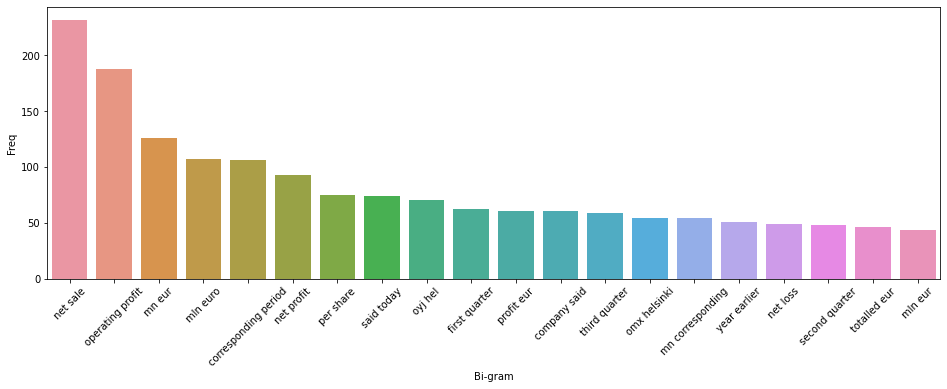

In [ ]:
top20_bigram = top2_df.iloc[0:20,:]

fig = plt.figure(figsize = (16,5))

plot = sns.barplot(x=top20_bigram["Bi-gram"], y = top20_bigram["Freq"])

plot.set_xticklabels(rotation = 45, labels = top20_bigram["Bi-gram"])

In [ ]:
freq_bigram = pd.Series(str(top2_words)).value_counts()[:20] #top 20 words
freq_bigram

[('net sale', 232), ('operating profit', 188), ('mn eur', 126), ('mln euro', 107), ('corresponding period', 106), ('net profit', 93), ('per share', 75), ('said today', 74), ('oyj hel', 70), ('first quarter', 62), ('profit eur', 61), ('company said', 61), ('third quarter', 59), ('omx helsinki', 54), ('mn corresponding', 54), ('year earlier', 51), ('net loss', 49), ('second quarter', 48), ('totalled eur', 46), ('mln eur', 44), ('profit rose', 44), ('last year', 43), ('rose eur', 43), ('mn compared', 43), ('stock exchange', 42), ('share price', 41), ('million usd', 41), ('totaled eur', 38), ('quarter 2010', 37), ('share capital', 36), ('board director', 36), ('first half', 36), ('loss eur', 35), ('quarter 2008', 35), ('nine month', 33), ('quarter 2007', 33), ('earnings per', 33), ('oyj said', 32), ('sale eur', 31), ('quarter 2009', 31), ('million euro', 30), ('period 2009', 30), ('first nine', 29), ('stora enso', 29), ('market share', 29), ('2010 finnish', 28), ('alma medium', 28), ('four

# **TFIDF - Term frequency inverse Document Frequency**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [ ]:
X_tfidf = vectorizer.fit_transform(df['clean_text'])

In [ ]:
vectorizer.vocabulary_

{'geosolutions': 5168,
 'technology': 10252,
 'leverage': 6532,
 'benefon': 2420,
 'gps': 5251,
 'solution': 9698,
 'providing': 8422,
 'location': 6637,
 'based': 2338,
 'search': 9296,
 'community': 3193,
 'platform': 8107,
 'relevant': 8771,
 'multimedia': 7253,
 'content': 3349,
 'new': 7387,
 'powerful': 8224,
 'commercial': 3174,
 'model': 7147,
 'esi': 4325,
 'low': 6700,
 '150': 351,
 '250': 732,
 'bk': 2505,
 'real': 8629,
 'possibility': 8199,
 'last': 6440,
 'quarter': 8509,
 '2010': 601,
 'componenta': 3244,
 'net': 7373,
 'sale': 9158,
 'doubled': 3947,
 'eur131m': 4385,
 'eur76m': 4504,
 'period': 7976,
 'year': 11289,
 'earlier': 4051,
 'moved': 7221,
 'zero': 11339,
 'pretax': 8288,
 'profit': 8355,
 'loss': 6686,
 'eur7m': 4505,
 'according': 1682,
 'finnishrussian': 4850,
 'chamber': 2960,
 'commerce': 3173,
 'major': 6803,
 'construction': 3331,
 'company': 3211,
 'finland': 4838,
 'operating': 7674,
 'russia': 9099,
 'swedish': 10123,
 'buyout': 2765,
 'firm': 4859,

In [ ]:
feature_names = list(vectorizer.vocabulary_.keys())

In [ ]:
X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

In [ ]:
X_tfidf.head()

,geosolutions,technology,leverage,benefon,gps,solution,providing,location,based,search,...,kostiainen,divi,tie1v,plunged,294,41733110,553,9400,585,225
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['Sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,Y,test_size=0.25)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report 

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7235161532682194


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.23      0.33       153
           1       0.72      0.91      0.81       714
           2       0.74      0.60      0.66       464

    accuracy                           0.72      1331
   macro avg       0.69      0.58      0.60      1331
weighted avg       0.72      0.72      0.70      1331



# **Balancing the data by Smote**

In [ ]:
# Apply SMOTE to balance dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

y.value_counts()

2    2856
0    2856
1    2856
Name: Sentiment, dtype: int64

# **Multinomial Naive Bayes**

In [ ]:
# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)



MultinomialNB()

In [ ]:
# Predict on test data
y_pred = mnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       850
           1       0.85      0.76      0.80       878
           2       0.82      0.76      0.79       843

    accuracy                           0.83      2571
   macro avg       0.83      0.83      0.82      2571
weighted avg       0.83      0.83      0.82      2571



# **Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict on test data
y_pred = rf.predict(X_test)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       850
           1       0.79      0.88      0.83       878
           2       0.88      0.77      0.82       843

    accuracy                           0.86      2571
   macro avg       0.87      0.86      0.86      2571
weighted avg       0.87      0.86      0.86      2571



# **XGBoost**

In [ ]:
model = XGBClassifier(n_estimators = 90, max_depth = 3)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       850
           1       0.70      0.86      0.77       878
           2       0.81      0.68      0.74       843

    accuracy                           0.78      2571
   macro avg       0.79      0.78      0.78      2571
weighted avg       0.79      0.78      0.78      2571



# **K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Predict on test data
y_pred = knn.predict(X_test)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       850
           1       0.89      0.22      0.35       878
           2       0.78      0.63      0.70       843

    accuracy                           0.61      2571
   macro avg       0.73      0.62      0.57      2571
weighted avg       0.73      0.61      0.57      2571



In [ ]:
from sklearn.model_selection import cross_val_score

Scores=cross_val_score(rf, X=X, y=y , cv = 5)
print(Scores)

[0.81271879 0.8529755  0.85355893 0.92119089 0.92936369]


# **Word2Vec Model**

In [ ]:
import gensim.downloader as api

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.svm import LinearSVC
import gensim
from gensim.models import Word2Vec, KeyedVectors
from tqdm import tqdm

In [ ]:
import pandas as pd

# example dataframe with "Sentence" and "Sentiment" columns
data = pd.DataFrame({'Sentence': ['This is a duplicate sentence.', 'This is a duplicate sentence.', 'This is a unique sentence.'], 'Sentiment': [0, 1, 0]})

# identify duplicate sentences with different sentiment labels
duplicates = []
for i, sent1 in enumerate(df["Sentence"]):
    for j, sent2 in enumerate(df["Sentence"]):
        if i < j and sent1 == sent2 and df["Sentiment"][i] != df["Sentiment"][j]:
            duplicates.append((i, j))

# convert duplicates to DataFrame
duplicates = pd.DataFrame(duplicates, columns=['index1', 'index2'])

# drop the duplicates from the original dataframe
df.drop(duplicates['index2'], inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df

,Sentence,Sentiment,clean_text
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale doubled ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining 224 percent...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising cost forced packaging producer huhtamak...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line eu deci...
5840,"In the building and home improvement trade , s...",neutral,building home improvement trade sale decreased...


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df

,Sentence,Sentiment,clean_text
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale doubled ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining 224 percent...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising cost forced packaging producer huhtamak...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line eu deci...
5840,"In the building and home improvement trade , s...",neutral,building home improvement trade sale decreased...


In [ ]:
model_data = df[['clean_text','Sentiment']]
model_data

,clean_text,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale doubled ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining 224 percent...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking first used summer training meth...,neutral
5839,according shipping company viking line eu deci...,neutral
5840,building home improvement trade sale decreased...,neutral


In [ ]:
empty_rows = df[df['clean_text'] == ''].index
print(empty_rows)

Int64Index([921], dtype='int64')


In [ ]:
model_data = model_data.drop(921)

In [ ]:
model_data

,clean_text,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale doubled ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining 224 percent...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking first used summer training meth...,neutral
5839,according shipping company viking line eu deci...,neutral
5840,building home improvement trade sale decreased...,neutral


In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_profit = wv['profit']

[=================================================-] 99.8% 1659.1/1662.8MB downloaded


In [ ]:
print(vec_profit.shape)
vec_profit

(300,)


array([-1.49414062e-01, -1.19628906e-01, -1.47460938e-01,  1.68945312e-01,
       -2.14843750e-01, -3.45703125e-01,  1.55029297e-02, -5.54199219e-02,
        2.92968750e-01,  1.41601562e-01, -2.63671875e-01,  1.38671875e-01,
        1.77734375e-01,  1.06933594e-01, -3.28125000e-01,  1.15234375e-01,
       -1.17675781e-01, -8.48388672e-03,  3.02734375e-01, -4.51660156e-02,
        3.71093750e-02,  6.98242188e-02, -8.39843750e-02, -2.57812500e-01,
        9.86328125e-02,  1.58203125e-01, -1.05468750e-01,  3.56445312e-02,
       -1.22558594e-01, -2.37304688e-01, -7.37304688e-02,  1.36108398e-02,
       -2.13867188e-01, -1.01074219e-01, -3.93066406e-02,  1.51367188e-01,
       -1.93359375e-01,  3.73535156e-02, -2.70996094e-02,  2.77343750e-01,
        2.77343750e-01, -2.27355957e-03,  2.18750000e-01,  8.30078125e-02,
       -5.68847656e-02, -3.24218750e-01,  4.00390625e-02,  2.67578125e-01,
       -2.61718750e-01,  1.91406250e-01,  2.71484375e-01,  5.64575195e-03,
       -7.91015625e-02,  

In [ ]:
from gensim.utils import simple_preprocess
from nltk import sent_tokenize

In [ ]:
from nltk.lm import vocabulary
vocab=[]
for sent in model_data['clean_text']:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        vocab.append(simple_preprocess(sent))

In [ ]:
len(vocab)

5321

In [ ]:
model = gensim.models.Word2Vec(vocab)

In [ ]:
model.wv.index2word

['eur',
 'company',
 'mn',
 'sale',
 'share',
 'said',
 'finnish',
 'profit',
 'million',
 'net',
 'year',
 'group',
 'finland',
 'market',
 'service',
 'mln',
 'operating',
 'new',
 'business',
 'period',
 'quarter',
 'euro',
 'oyj',
 'also',
 'first',
 'today',
 'loss',
 'price',
 'product',
 'operation',
 'contract',
 'solution',
 'helsinki',
 'total',
 'stock',
 'compared',
 'percent',
 'bank',
 'plant',
 'order',
 'unit',
 'system',
 'per',
 'financial',
 'customer',
 'investment',
 'nokia',
 'technology',
 'corresponding',
 'corporation',
 'capital',
 'result',
 'project',
 'well',
 'report',
 'according',
 'increase',
 'mobile',
 'production',
 'value',
 'increased',
 'deal',
 'rose',
 'hel',
 'agreement',
 'plc',
 'board',
 'area',
 'part',
 'industry',
 'last',
 'month',
 'ceo',
 'building',
 'pct',
 'construction',
 'buy',
 'aapl',
 'network',
 'would',
 'usd',
 'oy',
 'development',
 'one',
 'line',
 'second',
 'billion',
 'growth',
 'long',
 'expected',
 'time',
 'earlier',

In [ ]:
model.corpus_count

5321

In [ ]:
model.epochs

5

In [ ]:
vocab[1]

['esi', 'low', 'bk', 'real', 'possibility']

In [ ]:
model.wv['good']


array([-0.28738388, -0.5489591 ,  0.20775175, -0.40722638,  0.58804274,
       -0.01892392,  0.25686204, -0.0745376 ,  0.29727596, -0.36757785,
       -0.22674643, -0.35188192,  0.01552586,  0.352942  , -0.20183356,
       -0.61175364,  0.22986364,  0.5014571 , -0.03766856,  0.094903  ,
       -0.00191033, -0.31029186,  0.20104067,  0.15120217,  0.16301113,
        0.31905535, -0.12144923, -0.28470343,  0.5131905 ,  0.02723409,
       -0.1861751 , -0.48249513,  0.1429234 , -0.15750456, -0.36216497,
        0.00612907,  0.09006108,  0.15542638, -0.4446649 ,  0.05845371,
       -0.5550431 , -0.24000773,  0.21948986,  0.05195371, -0.30318084,
        0.45618293, -0.4569388 , -0.0785881 ,  0.12072643, -0.26827496,
        0.37251452,  0.48742643, -0.02473357, -0.19873753,  0.15430126,
       -0.00113759,  0.1213667 , -0.35937467, -0.13853188, -0.02549432,
        0.07260489,  0.3223319 ,  0.01377245,  0.04558135, -0.2204732 ,
        0.45886597,  0.26826072,  0.2607318 , -0.36746934, -0.65

In [ ]:
print(model.wv['good'].shape)

(100,)


In [ ]:
import numpy as np

def avg_word2vec(text):
    return np.mean([model.wv[word] for word in text if word in model.wv.index2word], axis=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = le.fit_transform(model_data['Sentiment'])

In [ ]:
y.shape

(5321,)

In [ ]:
import numpy as np
X=[]
for i in tqdm(range(len(vocab))):
    X.append(avg_word2vec(vocab[i]))

  0%|          | 0/5321 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5321/5321 [00:01<00:00, 5023.39it/s]


In [ ]:
len(X)

5321

In [ ]:
X[1]

array([-0.20600575, -0.38817334,  0.14586782, -0.29120564,  0.41512555,
       -0.0166002 ,  0.18842362, -0.05031678,  0.21404749, -0.25926656,
       -0.15576908, -0.2577887 ,  0.00908811,  0.2540775 , -0.13912332,
       -0.43537414,  0.16651869,  0.36010373, -0.03140844,  0.06584395,
       -0.00325145, -0.22173387,  0.14214021,  0.10808265,  0.11707491,
        0.23083699, -0.08641066, -0.20260584,  0.3727914 ,  0.0215517 ,
       -0.13710427, -0.3466348 ,  0.10580255, -0.11282538, -0.2554976 ,
        0.00717664,  0.05760396,  0.10984217, -0.32466835,  0.04590862,
       -0.40379113, -0.17440158,  0.16019979,  0.04369197, -0.2163525 ,
        0.32447547, -0.32721734, -0.05144022,  0.08579338, -0.193075  ,
        0.26540577,  0.33840144, -0.01276387, -0.14443311,  0.10828561,
        0.00361321,  0.09325749, -0.25488782, -0.0991689 , -0.01647287,
        0.05192525,  0.22669691,  0.00759632,  0.03039891, -0.15763104,
        0.32470787,  0.18372817,  0.18828918, -0.25879592, -0.46

In [ ]:
X_new = np.array(X)

<ipython-input-50-fed0be51dbbf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new = np.array(X)


In [ ]:
print(X_new.shape)
print(X_new[0].shape)

(5321,)
(100,)


In [ ]:
X[0].reshape(1,-1).shape

(1, 100)

In [ ]:
dff=pd.DataFrame()
for i in range(0,len(X)):
    dff=dff.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)

In [ ]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.198675,-0.368655,0.131170,-0.282352,0.402435,-0.026595,0.185059,-0.051007,0.204905,-0.248835,...,-0.286588,-0.076807,0.170700,0.236180,0.168382,0.101956,0.163952,-0.228097,0.299032,0.130653
1,-0.206006,-0.388173,0.145868,-0.291206,0.415126,-0.016600,0.188424,-0.050317,0.214047,-0.259267,...,-0.293499,-0.078789,0.175864,0.251238,0.176373,0.110555,0.168013,-0.230098,0.308576,0.132246
2,-0.249717,-0.560052,0.386868,-0.345579,0.487404,0.299551,-0.009222,-0.061866,0.236117,-0.239613,...,-0.209937,-0.000680,0.051132,0.311253,0.339013,0.209797,0.206076,-0.074112,0.281677,0.018473
3,-0.329402,-0.630225,0.260935,-0.467555,0.664273,0.015652,0.263937,-0.083819,0.339616,-0.399153,...,-0.448743,-0.109679,0.255382,0.398729,0.306223,0.184177,0.271494,-0.341546,0.482043,0.190224
4,-0.226397,-0.431882,0.172343,-0.324869,0.458905,-0.001279,0.189327,-0.058157,0.235261,-0.280984,...,-0.313770,-0.081363,0.182023,0.276575,0.205195,0.123013,0.189627,-0.245074,0.336240,0.138116


In [ ]:
dff['Output']=y

In [ ]:
dff.shape

(5321, 101)

In [ ]:
dff.isnull().sum()

0         7
1         7
2         7
3         7
4         7
         ..
96        7
97        7
98        7
99        7
Output    0
Length: 101, dtype: int64

In [ ]:
dff.dropna(inplace=True)

In [ ]:
dff.shape

(5314, 101)

In [ ]:
X=dff.iloc[:,:100]

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
y=dff['Output']

In [ ]:
y.shape

(5314,)

In [ ]:
X.shape

(5314, 100)

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
2870,-0.281425,0.116030,-0.981087,-0.201960,-0.182225,0.295531,0.302966,0.327266,-0.011650,0.279311,...,0.042394,0.405893,0.174735,-0.026598,-0.640065,0.112102,-0.327375,-0.395843,0.477678,1
2715,-0.146456,0.057389,-0.517694,-0.099187,-0.093841,0.152666,0.156351,0.173632,-0.000244,0.146046,...,0.021342,0.210685,0.095309,-0.011933,-0.334038,0.059824,-0.173262,-0.205238,0.252290,2
1749,-0.243702,0.108056,-0.785048,-0.181621,-0.160134,0.240911,0.256918,0.272826,-0.042792,0.242626,...,0.039882,0.337713,0.116916,-0.032900,-0.519990,0.096204,-0.262420,-0.313452,0.364698,1
1406,-0.202846,0.081961,-0.728167,-0.139342,-0.128624,0.215900,0.221210,0.242044,0.002991,0.204734,...,0.029123,0.296578,0.136082,-0.017590,-0.473208,0.082675,-0.245305,-0.292328,0.359377,2
4071,-0.117849,0.047313,-0.430981,-0.080488,-0.075395,0.127065,0.130620,0.142488,0.005233,0.119580,...,0.016726,0.175603,0.083016,-0.008506,-0.280029,0.048108,-0.144809,-0.173176,0.212257,2


In [ ]:
y_train

656     1
1512    1
4191    2
3908    1
1156    2
       ..
5190    1
4221    1
5012    1
4532    1
274     1
Name: Output, Length: 3985, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an SVM classifier with default parameters
classifier = RandomForestClassifier()

# Fit the classifier to your training data
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.547027840481565


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.05      0.08       155
           1       0.60      0.78      0.68       730
           2       0.43      0.33      0.37       444

    accuracy                           0.55      1329
   macro avg       0.45      0.39      0.38      1329
weighted avg       0.51      0.55      0.51      1329

